In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from vit_keras import vit 
import matplotlib.pyplot as plt
import os



In [3]:
base_path = '//Users//aureozanon//Documents//DAAN570//Project//HG_Data//'

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.1)


In [5]:
train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(160, 160),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(160, 160),
    batch_size=64,
    class_mode='categorical',
    subset='validation')


Found 217789 images belonging to 12 classes.
Found 24193 images belonging to 12 classes.


In [8]:
vit_model = vit.vit_b32(
    image_size=160,  
    activation='softmax',
    pretrained=True,
    include_top=False,
    pretrained_top=False,
    classes=12)

model = tf.keras.Sequential([
    vit_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation=tf.nn.gelu),
    tf.keras.layers.Dense(12, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


353253686/353253686 [==============================] - 10s 0us/step


/Users/aureozanon/anaconda3/envs/DAAN570/lib/python3.11/site-packages/vit_keras/utils.py:81: UserWarning: Resizing position embeddings from 12, 12 to 5, 5
  warnings.warn(


In [9]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size)


Epoch 1/5
6805/6805 [==============================] - 10538s 2s/step - loss: 1.2611 - accuracy: 0.5565 - val_loss: 1.1896 - val_accuracy: 0.6085
Epoch 2/5
6805/6805 [==============================] - 11558s 2s/step - loss: 0.7398 - accuracy: 0.7383 - val_loss: 0.8651 - val_accuracy: 0.7073
Epoch 3/5
6805/6805 [==============================] - 11377s 2s/step - loss: 0.6764 - accuracy: 0.7620 - val_loss: 0.7560 - val_accuracy: 0.7409
Epoch 4/5
6805/6805 [==============================] - 10822s 2s/step - loss: 0.6995 - accuracy: 0.7535 - val_loss: 0.8748 - val_accuracy: 0.6973
Epoch 5/5
6805/6805 [==============================] - 11520s 2s/step - loss: 1.0504 - accuracy: 0.6312 - val_loss: 1.5497 - val_accuracy: 0.4713


In [ ]:
# Training the ViT model
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(
    train_generator,
    steps_per_epoch=(train_generator.samples // train_generator.batch_size) + (train_generator.samples % train_generator.batch_size > 0),
    validation_data=validation_generator,
    validation_steps=(validation_generator.samples // validation_generator.batch_size) + (validation_generator.samples % validation_generator.batch_size > 0),
    epochs=5 
)

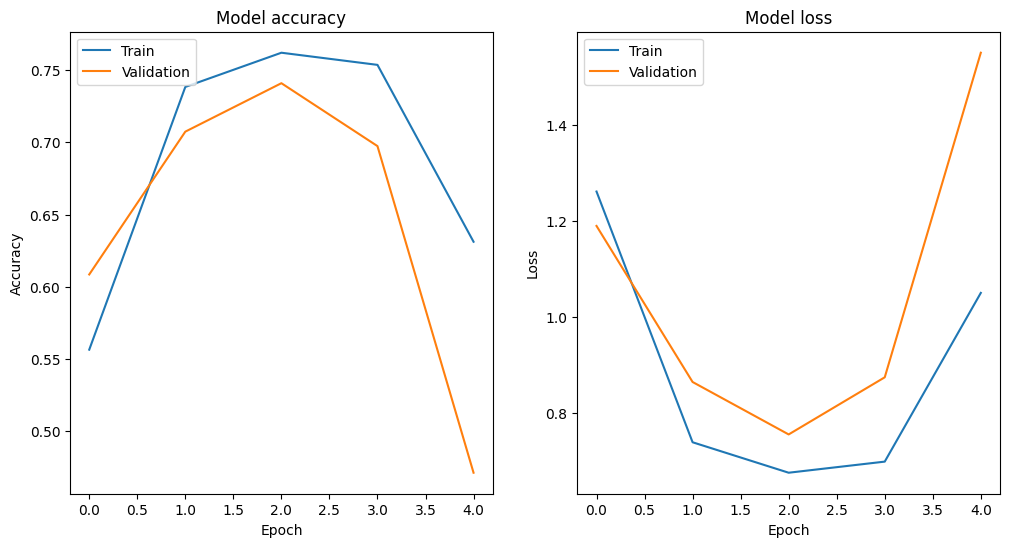

In [12]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
# Saving the model
model.save('//Users//aureozanon//Documents//DAAN570//Project//Models//hg_vit_az_08.keras')
model.save('//Users//aureozanon//Documents//DAAN570//Project//Models//hg_vit_az_08.h5')
model.save_weights('//Users//aureozanon//Documents//DAAN570//Project//Models//hg_vit_weights_az_08.h5')